In [115]:
import sys, os
sys.path.append(os.path.abspath(os.path.join('..')))

In [116]:
import numpy as np 
import scipy.fft
import scipy
from operators.setup_FOM import SimulationSetupFOM
from operators.FOM import psi_ln_aw, charge_density, D_matrix_inv_full, total_mass, total_momentum, total_energy_k, fft_
from matplotlib import animation
from IPython.display import HTML

In [117]:
%matplotlib inline
import matplotlib
font = {'family' : 'serif',
        'size'   : 14}

matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 

import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

plt.rcParams['figure.figsize'] = (5,3)
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 100
plt.rcParams["animation.html"] = "jshtml"  # for matplotlib 2.1 and above, uses JavaScript
#plt.rcParams["animation.html"] = "html5" # for matplotlib 2.0 and below, converts to x264 using ffmpeg video codec

# Nonlinear (Strong) Landau damping 

In [118]:
# setup parameters
sol_midpoint_t = np.linspace(0, 100, 1001)
Nx = 100
Nv = 300
# velocity grid for plotting purposes
v = np.linspace(-4, 4, int(10**3))
# spatial grid 
x = np.linspace(0, 4*np.pi, 2*Nx+1)

In [119]:
# read in reference electric field
f_ref = np.load("data/reference_alex_koshkarov/f_slice.npy")
v_ref = np.load("data/reference_alex_koshkarov/v_grid.npy")

In [120]:
# collisionless with closure by truncation 
f_collisionless = np.load("data/nonlinear_landau_300/f_slice_300_closure_truncation_collisions_collisionless_None_nu_0.npy")

In [121]:
# hammett-perkins 
f_hp = np.load("data/nonlinear_landau_300/f_slice_300_closure_hammett_perkins_collisions_collisionless_None_nu_0.npy")

In [122]:
# Houli 
f_houli = np.load("data/nonlinear_landau_300/f_slice_300_closure_truncation_collisions_hou_li_None_nu_12.228.npy")

In [123]:
# hyper 1 
f_hyper1 = np.load("data/nonlinear_landau_300/f_slice_300_closure_truncation_collisions_hyper_1_nu_0.55.npy")

In [124]:
# hyper 2 
f_hyper2  = np.load("data/nonlinear_landau_300/f_slice_300_closure_truncation_collisions_hyper_2_nu_1.312.npy")

In [125]:
# hyper 3 
f_hyper3 = np.load("data/nonlinear_landau_300/f_slice_300_closure_truncation_collisions_hyper_3_nu_2.013.npy")

In [126]:
f_hyper4 = np.load("data/nonlinear_landau_300/f_slice_300_closure_truncation_collisions_hyper_4_nu_2.7446.npy")

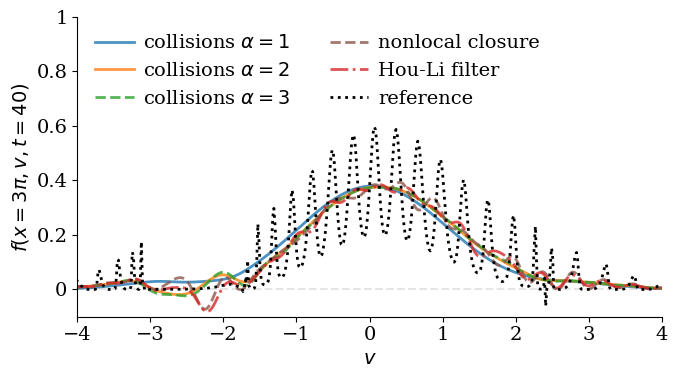

In [135]:
# plot the electric field dampin rate
fig, ax = plt.subplots(figsize=(7, 4))

# hyper 1 (LB) tab:blue -
ax.plot(v, f_hyper1, "-", c="tab:blue", alpha=0.8, linewidth=2, label=r"collisions $\alpha=1$") 

# hyper 2 (Camporeale) tab:orange -
ax.plot(v, f_hyper2, "-", c="tab:orange", alpha=0.8, linewidth=2, label=r"collisions $\alpha=2$") 

# hyper 3 tab:green -
ax.plot(v, f_hyper3, "--", c="tab:green", alpha=0.8, linewidth=2, label=r"collisions $\alpha=3$") 


# nonlocal closure tab: brown --
ax.plot(v, f_hp, "--", c="tab:brown", alpha=0.8, linewidth=2, label=r"nonlocal closure") 

# hou li filter
ax.plot(v, f_houli, "-.", c="tab:red", alpha=0.8, linewidth=2, label="Hou-Li filter") 

# reference
ax.plot(v_ref[::16], f_ref[::16], ":", c="black", linewidth=2, label=r"reference") 
ax.set_xlim(-4, 4)
ax.set_ylim(-0.1, 1)
ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
ax.set_yticklabels([0, 0.2, 0.4, 0.6, 0.8, 1])
#plt.grid(alpha=0.3)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylabel("$f(x=3\pi, v, t=40)$")
ax.set_xlabel("$v$")
ax.axhline(0, c="black", alpha=0.1, ls="--")
legend = ax.legend(ncols=2, fancybox=False, shadow=False, fontsize=14, loc="upper left", handletextpad=0.5)
legend.get_frame().set_alpha(0)
plt.tight_layout()
plt.savefig("figs/nonlinear_landau/manuscript/f_slice_t_40.png", dpi=200, bbox_inches='tight')

In [106]:
f_filter_ref = np.interp(v, v_ref, scipy.ndimage.gaussian_filter(f_ref, sigma=100), left=None, right=None, period=None)

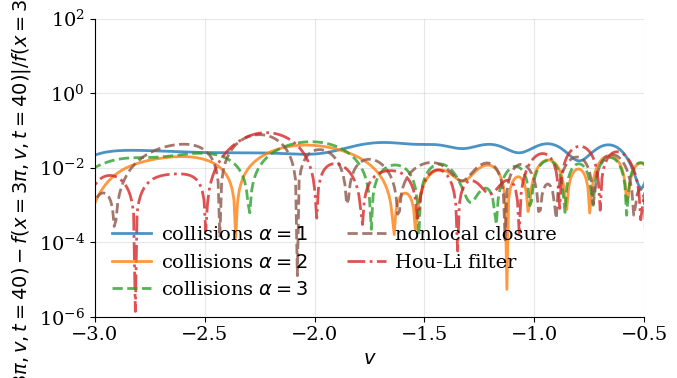

In [109]:
# plot the electric field dampin rate
fig, ax = plt.subplots(figsize=(7, 4))

# hyper 1 (LB) tab:blue -
ax.plot(v, np.abs(f_hyper1 - f_filter_ref), "-", c="tab:blue", alpha=0.8, linewidth=2, label=r"collisions $\alpha=1$") 

# hyper 2 (Camporeale) tab:orange -
ax.plot(v, np.abs(f_hyper2 - f_filter_ref), "-", c="tab:orange", alpha=0.8, linewidth=2, label=r"collisions $\alpha=2$") 

# hyper 3 tab:green -
ax.plot(v, np.abs(f_hyper3 - f_filter_ref), "--", c="tab:green", alpha=0.8, linewidth=2, label=r"collisions $\alpha=3$") 

# nonlocal closure tab: brown --
ax.plot(v, np.abs(f_hp- f_filter_ref), "--", c="tab:brown", alpha=0.8, linewidth=2, label=r"nonlocal closure") 

# hou li filter
ax.plot(v, np.abs(f_houli - f_filter_ref), "-.", c="tab:red", alpha=0.8, linewidth=2, label="Hou-Li filter") 

ax.set_xlim(-3, -0.5)
ax.set_yscale("log")
ax.set_ylim(1e-6, 100)
plt.grid(alpha=0.3)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylabel("$|f(x=3\pi, v, t=40) - f(x=3\pi, v, t=40)|/ f(x=3\pi, v, t=40)$")
ax.set_xlabel("$v$")
legend = ax.legend(ncols=2, fancybox=False, shadow=False, fontsize=14, loc="lower left", handletextpad=0.5)
legend.get_frame().set_alpha(0)
plt.tight_layout()
plt.savefig("figs/nonlinear_landau/manuscript/f_slice_t_40_error.png", dpi=200, bbox_inches='tight')

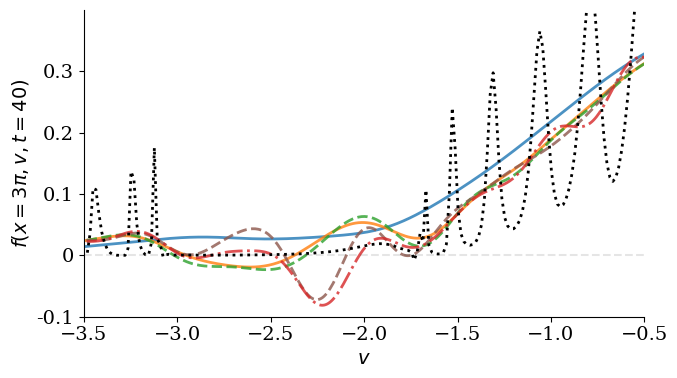

In [134]:
# plot the electric field dampin rate
fig, ax = plt.subplots(figsize=(7, 4))

# hyper 1 (LB) tab:blue -
ax.plot(v, f_hyper1, "-", c="tab:blue", alpha=0.8, linewidth=2, label=r"collisions $\alpha=1$") 

# hyper 2 (Camporeale) tab:orange -
ax.plot(v, f_hyper2, "-", c="tab:orange", alpha=0.8, linewidth=2, label=r"collisions $\alpha=2$") 

# hyper 3 tab:green -
ax.plot(v, f_hyper3, "--", c="tab:green", alpha=0.8, linewidth=2, label=r"collisions $\alpha=3$") 

# nonlocal closure tab: brown --
ax.plot(v, f_hp, "--", c="tab:brown", alpha=0.8, linewidth=2, label=r"nonlocal closure") 

# hou li filter
ax.plot(v, f_houli, "-.", c="tab:red", alpha=0.8, linewidth=2, label="Hou-Li filter") 

# reference
ax.plot(v_ref[::16], f_ref[::16], ":", c="black", linewidth=2, label=r"reference") 


ax.set_xlim(-3.5, -0.5)
ax.set_ylim(-0.1, 0.4)
ax.set_yticks([-0.1, 0, 0.1, 0.2, 0.3])
ax.set_yticklabels([-0.1, 0, 0.1, 0.2, 0.3])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylabel("$f(x=3\pi, v, t=40)$")
ax.set_xlabel("$v$")
ax.axhline(0, c="black", alpha=0.1, ls="--")
#legend = ax.legend(ncols=2, fancybox=False, shadow=False, fontsize=14, loc="upper left", handletextpad=0.5)
#legend.get_frame().set_alpha(0)
plt.tight_layout()
plt.savefig("figs/nonlinear_landau/manuscript/f_slice_t_40_zoom.png", dpi=200, bbox_inches='tight')